In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.axes as axis

In [2]:
def normalize(fold_data,icount_data): #creating function for normalizing folded pulse data
    
    norm_data = np.zeros_like(fold_data) #initializing array for normalized data
    
    for i in range(len(fold_data[:,:,:])): #looping over how ever many itterations within the folded data necessary to fill norm_data
        norm_data[:,:,:,i] = fold_data[:,:,:,i]/icount_data[:,:,:] #normalizing data
    
    return norm_data

In [3]:
def new_norm(fold_data,icount_data): #creating function for normalizing folded pulse data
    
    norm_data = np.zeros_like(icount_data) #initializing array for normalized data
    norm_data = fold_data[:,:,:,0]/icount_data[:,:,:] #normalizing data
    
    return norm_data

In [4]:
def plotting(folded_data, norm_data,j,plot_size):
    for i in range(len(folded_data)):
        plt.figure(figsize=(plot_size,plot_size))
        plt.imshow(norm_data[i,:,:],cmap='viridis',aspect='auto')
        plt.yticks(range(0,32768,500))
        plt.colorbar()
        plt.xlabel('Phase', size='20')
        plt.ylabel('Frequency', size='20')
        plt.savefig('Figure_'+str(j)+'.'+str(i)+'.png')

In [5]:
def mask_bands(data):
    i = 0
    l = 0
    m = 0
    for h in range(len(data[:,0,0])):
        for k in range(len(data[0,0,:])):
            for j in range(len(data[0,:,0])):
                if (i >= 10500 and i <= 11700) or (i >= 13500 and i <= 14000) or (i >= 15000 and i <= 15500):
                    data[m,i,l] = 0
                    i = i+1
                else:
                    i = i+1
            i=0
            l=l+1
        i=0
        l=0
        m = m+1
    return data

def mask_bands_specific(data,low_1,high_1,low_2,high_2,low_3,high_3):
    i = 0
    l = 0
    m = 0
    for h in range(len(data[:,0,0])):
        for k in range(len(data[0,0,:])):
            for j in range(len(data[0,:,0])):
                if (i >= low_1 and i <= high_1) or (i >= low_2 and i <= high_2) or (i >= low_3 and i <= high_3):
                    data[m,i,l] = 0
                    i = i+1
                else:
                    i = i+1
            i=0
            l=l+1
        i=0
        l=0
        m = m+1
    return data

In [26]:
np.mean(norm_data_1,axis=(0,2),keepdims=True)

(1, 32768, 1)

In [6]:
start = "arochime-invpfbB0329+54_32768chan3ntbin"
fold = "foldspec_2018-08-16T10:"
icount = "icount_2018-08-16T10:"
end = ".000+30.000000000000004sec"
    
data1 = np.load(start+fold+str(38)+":"+str(30)+end+".npy")
data2 = np.load(start+icount+str(38)+":"+str(30)+end+".npy")

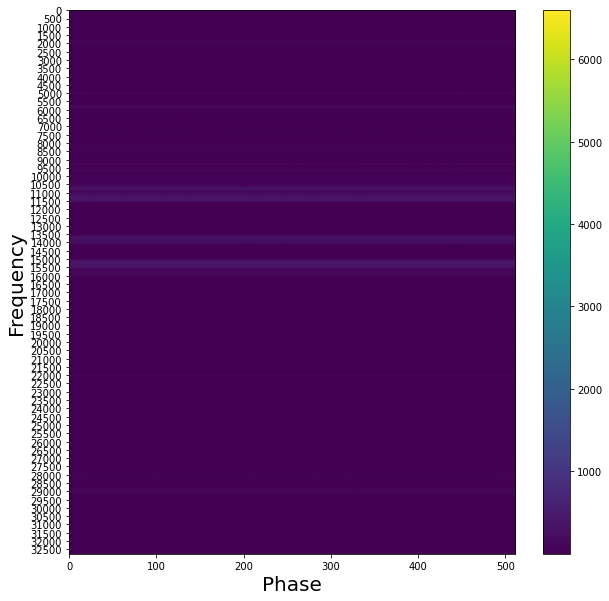

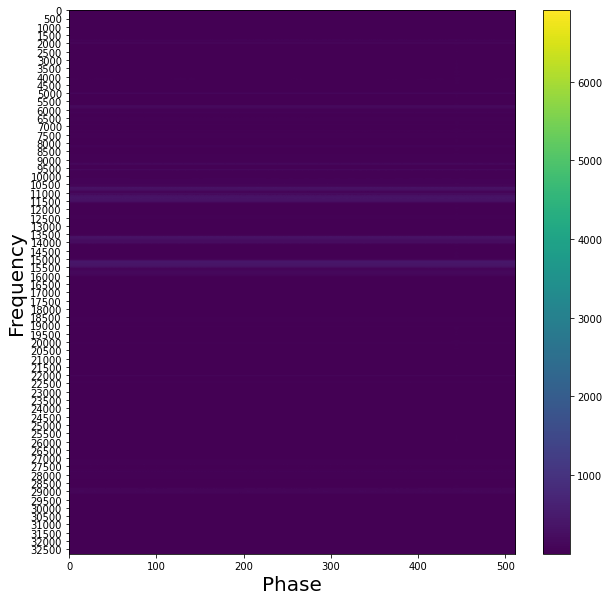

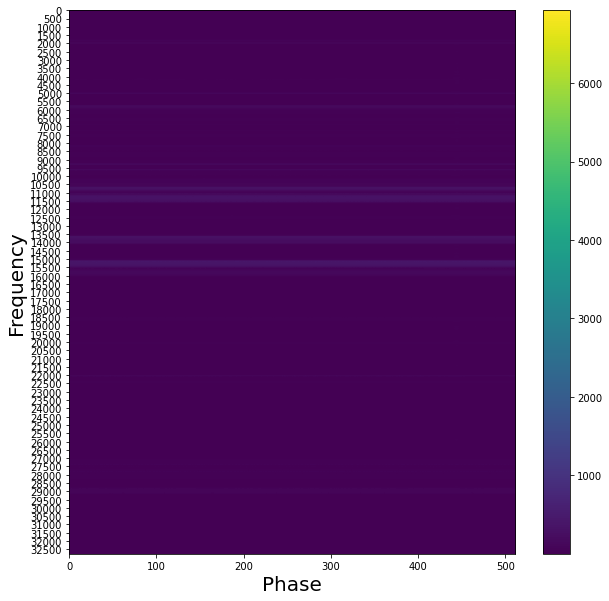

In [7]:
j=0
data_fold_1 = np.load(start+fold+str(47)+":"+str(30)+end+".npy")
data_count_1 = np.load(start+icount+str(47)+":"+str(30)+end+".npy")
norm_data_1 = new_norm(data_fold_1,data_count_1)
plotting(data_fold_1,norm_data_1,j,10)

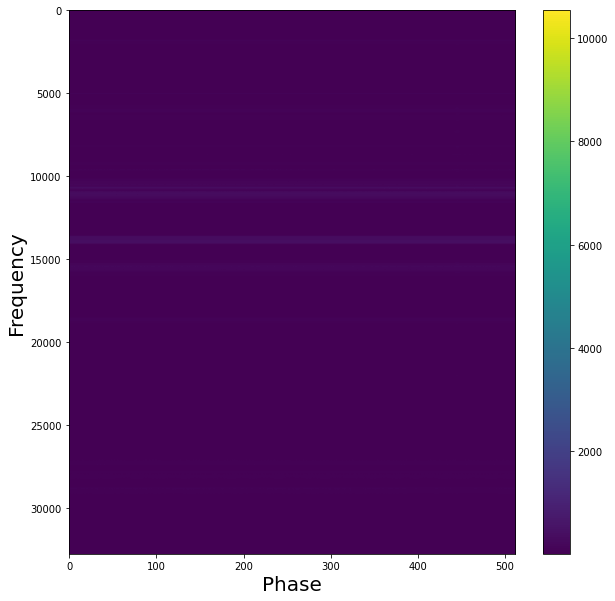

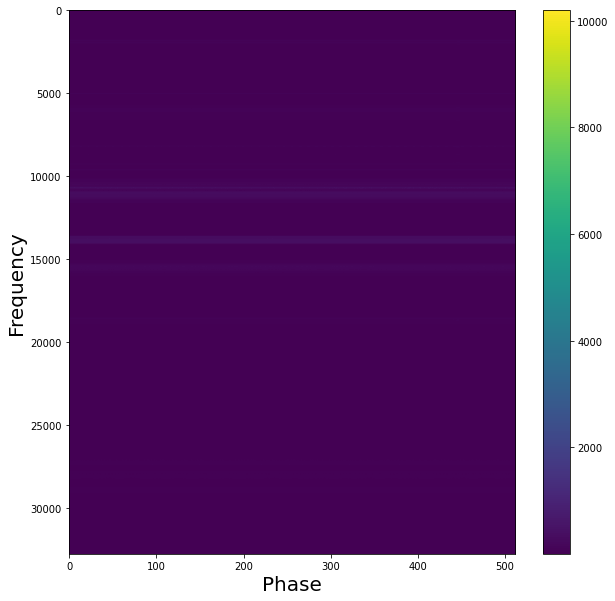

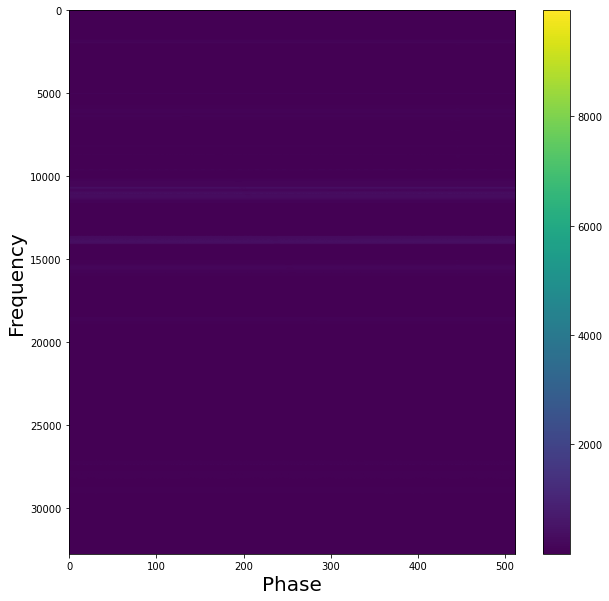

In [76]:
j=1
data_fold_1 = np.load(start+fold+str(53)+":00"+end+".npy")
data_count_1 = np.load(start+icount+str(53)+":00"+end+".npy")
norm_data_1 = new_norm(data_fold_1,data_count_1)
plotting(data_fold_1,norm_data_1,j,10)

0.05573340539652932

In [ ]:
#################### EVERYTHING BELOW IS SCRATCH WORK ############################

In [45]:
len(data1)
print(data1[0,:,0,0])
#print(data1[0,0,:,0])
print(data1[:,0,1,0])

[20.894543 22.04368  23.128796 ... 35.283733 35.07841  34.861423]
[19.661644 20.953207 16.106157]


CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 10.3 µs


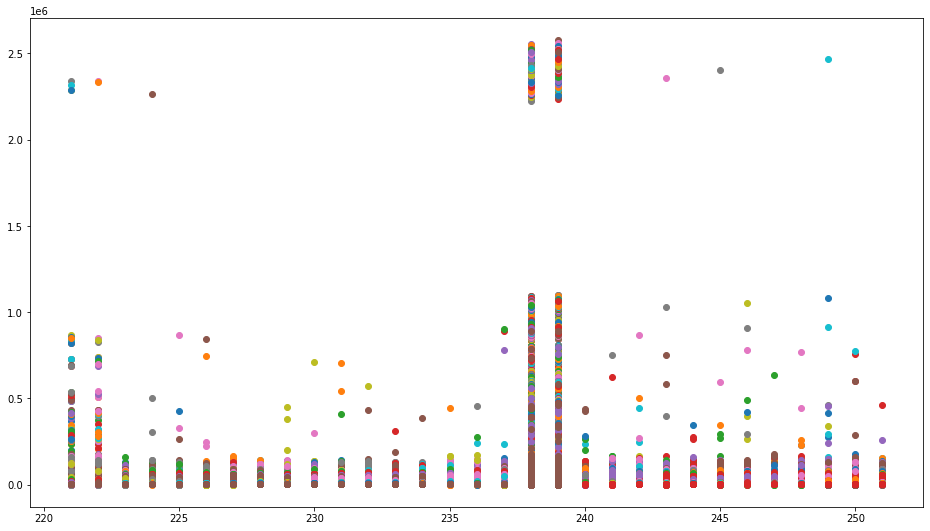

In [70]:
plt.figure(figsize=(16,9))
for i in range(len(data1)):
    for j in range(len(data1[0,0,:,0])):
            plt.plot(data2[i,:,j],data1[i,:,j,0], 'o')
    #plt.xlim(237,240)
plt.savefig('fig1.png')
%time

In [83]:
%time
#test1 = np.zeros_like(data1)
interm = np.zeros_like(data1)
for i in range(len(data1)):
    for j in range(len(data1[0,0,:,0])):
        test1[i,:,j,0] = test1[i,:,j,0]+data1[i,:,j,0]
    #plt.xlim(237,240)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 19.1 µs


NameError: name 'test1e' is not defined

In [86]:
%time
#test1 = np.zeros_like(data1)
test_01 = np.zeros(len(data1[0,:,0,0]))
interm = np.zeros_like(data1)
for i in range(len(data1)):
    for j in range(len(data1[0,0,:,0])):
        test_01 = test_01+data1[i,:,j,0]
    #plt.xlim(237,240)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 11.9 µs


32768

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 9.78 µs


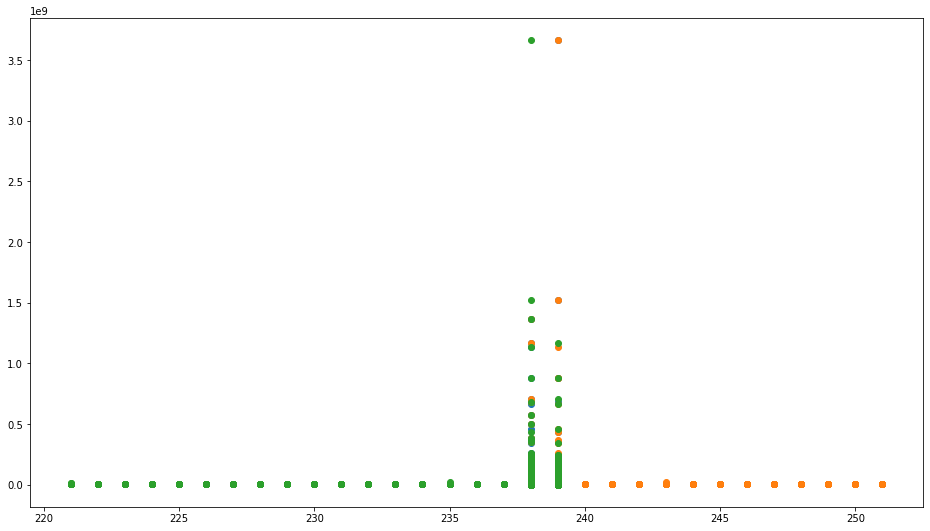

In [89]:
plt.figure(figsize=(16,9))
for i in range(len(data1)):
    plt.plot(data2[i,:,0],test_01, 'o')
plt.savefig('fig2.png')
%time

In [82]:
print(len(test1[0,0,:,0]))

512


In [ ]:
plt.figure(figsize=(16,9))
for i in range(len(data1)):
    plt.plot(data2[i,:,j],test1[i,:,j,0], 'o')
plt.savefig('fig2.png')
%time